In [22]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
(train_input, train_target), (test_input, test_target) =\
keras.datasets.fashion_mnist.load_data()

In [25]:
train_scaled = train_input.reshape(-1, 28,28,1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

In [26]:
train_scaled.shape

(48000, 28, 28, 1)

In [27]:
val_scaled.shape

(12000, 28, 28, 1)

In [28]:
model = keras.Sequential()#안에 선택해서 넣을수있다.
#신경망 객체
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu',
          padding='same', input_shape=(28,28,1)))
#kernel sizre도장의 크기 (필터개수) 
#padding 가장자리족 도장을 더 여러게 찍을수있도록
#input shape 3차원 배열이라는 뜻이 3개

In [29]:
model.add(keras.layers.MaxPool2D(2,2))

In [30]:
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu',
          padding='same'))
model.add(keras.layers.MaxPool2D(2,2))

In [31]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 100)              

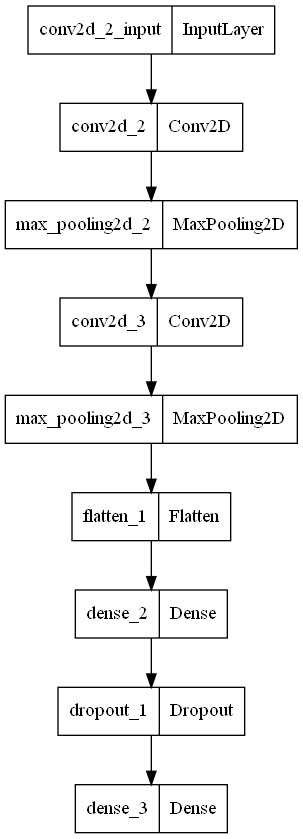

In [33]:
keras.utils.plot_model(model)

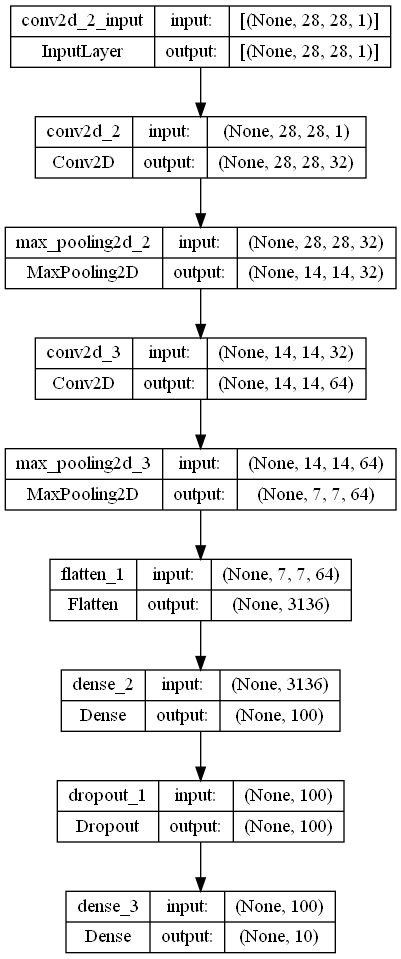

In [34]:
keras.utils.plot_model(model, show_shapes = True)

In [35]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [36]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5',
                                                save_best_only=True)
##patience=2, 비교빈도가 2개 동안 떨어지지않으면 정지해라 란는 뜻임 restore_best_weights 매개변수로 복귀해라
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])
##epochs 잘대처하고있는 회전 20회

Epoch 1/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.5330 - accuracy: 0.8083 - val_loss: 0.3392 - val_accuracy: 0.8720
Epoch 2/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3567 - accuracy: 0.8713 - val_loss: 0.2825 - val_accuracy: 0.8958
Epoch 3/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3028 - accuracy: 0.8911 - val_loss: 0.2696 - val_accuracy: 0.8981
Epoch 4/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2712 - accuracy: 0.9018 - val_loss: 0.2423 - val_accuracy: 0.9116
Epoch 5/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2457 - accuracy: 0.9102 - val_loss: 0.2391 - val_accuracy: 0.9133
Epoch 6/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2268 - accuracy: 0.9171 - val_loss: 0.2299 - val_accuracy: 0.9168
Epoch 7/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2086 - accuracy: 0.9229 - val_loss: 0.2206 - val_ac

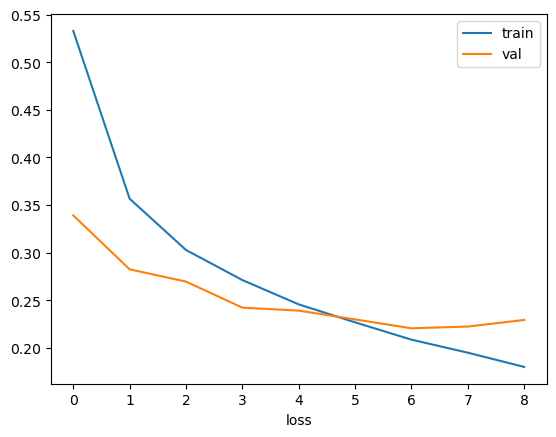

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.xlabel('loss')
plt.legend(['train','val'])
plt.show()
#8번 까지 돌면서 종료 시켯다

In [38]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.2206 - accuracy: 0.9193


[0.22055265307426453, 0.9193333387374878]

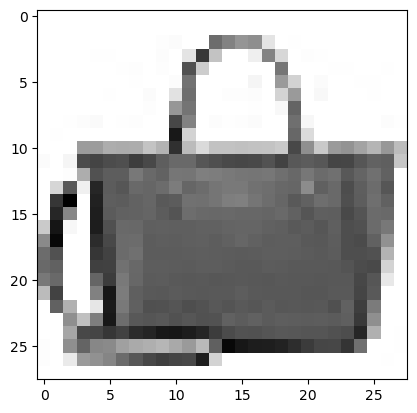

In [39]:
plt.imshow(val_scaled[0].reshape(28,28), cmap='gray_r')
plt.show()

In [40]:
preds = model.predict(val_scaled[0:1])

1/1 [==============================] - 0s 61ms/step


In [41]:
print(preds)

[[8.5158183e-16 2.0369165e-23 2.3242126e-20 9.3299852e-17 9.4120936e-18
  7.1045891e-19 5.9929487e-17 3.7268867e-18 1.0000000e+00 6.5936647e-21]]


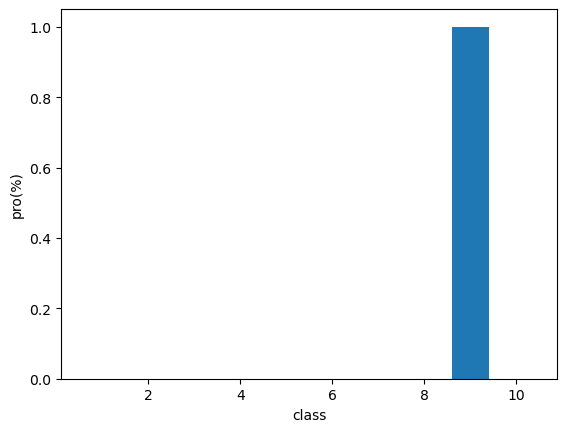

In [42]:
plt.bar(range(1,11), preds[0])
plt.xlabel('class')
plt.ylabel('pro(%)')
plt.show()

In [43]:
classes = ['T-shirst/top', 'Trouser','Pullover','Dress','Coat',
              'Sandal','Shirst','Sneakers','Bag','Ankle Boots']

In [44]:
print(classes[np.argmax(preds)])

Bag


In [45]:
from tensorflow.keras.datasets import imdb

In [46]:
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)

17464789/17464789 [==============================] - 2s 0us/step


In [47]:
print(train_input.shape, test_input.shape)

(25000,) (25000,)


In [48]:
train_input[0:10]
#토큰화(영어를 숫자화) 되어서 나옴 한문단이 댓글한개 

array([list([1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]),
       list([1, 194, 2, 194, 2, 78, 228, 5, 6, 2, 2, 2, 134, 26, 4, 2, 8, 118, 2, 14, 394, 20, 13, 119, 2, 189, 102, 5, 207, 110, 2, 21, 

In [49]:
print(len(train_input[0]))#1번문장의 길이 글자수

218


In [50]:
print(len(train_input[1]))# 2번문장의 2번째꺼

189


In [53]:
print(train_target[:20])#0은부정 1은긍정

[0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1]


In [51]:
train_target.shape

(25000,)

In [52]:
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

In [54]:
train_input.shape

(20000,)

In [55]:
lengths = np.array([len(x) for x in train_input])

In [56]:
len(lengths)

20000

In [57]:
lengths[0]

259

In [58]:
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


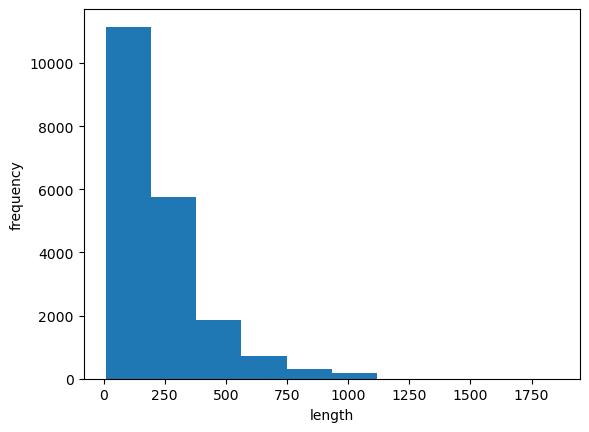

In [59]:
import matplotlib.pyplot as  plt
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

In [60]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [61]:
train_seq = pad_sequences(train_input, maxlen = 100)

In [62]:
print(train_seq.shape)

(20000, 100)


In [63]:
train_seq[5]

array([  0,   0,   0,   0,   1,   2, 195,  19,  49,   2,   2, 190,   4,
         2, 352,   2, 183,  10,  10,  13,  82,  79,   4,   2,  36,  71,
       269,   8,   2,  25,  19,  49,   7,   4,   2,   2,   2,   2,   2,
        10,  10,  48,  25,  40,   2,  11,   2,   2,  40,   2,   2,   5,
         4,   2,   2,  95,  14, 238,  56, 129,   2,  10,  10,  21,   2,
        94, 364, 352,   2,   2,  11, 190,  24, 484,   2,   7,  94, 205,
       405,  10,  10,  87,   2,  34,  49,   2,   7,   2,   2,   2,   2,
         2, 290,   2,  46,  48,  64,  18,   4,   2])

In [65]:
val_seq = pad_sequences(val_input, maxlen=100)

In [66]:
model = keras.Sequential()

In [67]:
model.add(keras.layers.SimpleRNN(8, input_shape=(100, 500)))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [68]:
train_oh = keras.utils.to_categorical(train_seq)

In [69]:
print(train_oh.shape)

(20000, 100, 500)


In [70]:
print(train_oh[0][0][:12])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [71]:
val_oh = keras.utils.to_categorical(val_seq)

In [72]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 4072      
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 4081 (15.94 KB)
Trainable params: 4081 (15.94 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [73]:
rmsprop = keras.optimizers.RMSprop(learning_rate=0.0001)

In [74]:
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

In [75]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_oh, train_target, epochs=100, batch_size=64,
                    validation_data=(val_oh, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 5s 13ms/step - loss: 0.6987 - accuracy: 0.5013 - val_loss: 0.6971 - val_accuracy: 0.4992
Epoch 2/100
313/313 [==============================] - 4s 12ms/step - loss: 0.6931 - accuracy: 0.5200 - val_loss: 0.6915 - val_accuracy: 0.5246
Epoch 3/100
313/313 [==============================] - 4s 12ms/step - loss: 0.6869 - accuracy: 0.5475 - val_loss: 0.6874 - val_accuracy: 0.5518
Epoch 4/100
313/313 [==============================] - 3s 11ms/step - loss: 0.6801 - accuracy: 0.5782 - val_loss: 0.6795 - val_accuracy: 0.5886
Epoch 5/100
313/313 [==============================] - 4s 11ms/step - loss: 0.6702 - accuracy: 0.6064 - val_loss: 0.6698 - val_accuracy: 0.6086
Epoch 6/100
313/313 [==============================] - 3s 11ms/step - loss: 0.6568 - accuracy: 0.6352 - val_loss: 0.6558 - val_accuracy: 0.6298
Epoch 7/100
313/313 [==============================] - 4s 11ms/step - loss: 0.6407 - accuracy: 0.6596 - val_loss: 0.6398 - val_accuracy:

C:\Users\kimtp\AppData\Local\Temp\ipykernel_26488\3031604643.py:5: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend('train', 'val')


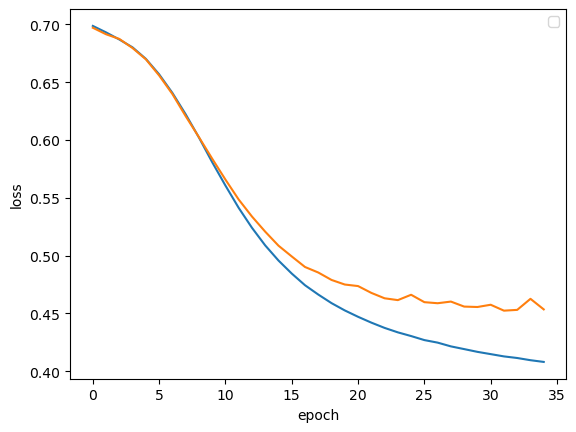

In [76]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend('train', 'val')
plt.show()

In [77]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1,activation='sigmoid'))

In [78]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8209 (32.07 KB)
Trainable params: 8209 (32.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [79]:
rmsprop = keras.optimizers.RMSprop(learning_rate=0.0001)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 6s 16ms/step - loss: 0.6860 - accuracy: 0.5518 - val_loss: 0.6697 - val_accuracy: 0.6098
Epoch 2/100
313/313 [==============================] - 4s 14ms/step - loss: 0.6502 - accuracy: 0.6603 - val_loss: 0.6425 - val_accuracy: 0.6710
Epoch 3/100
313/313 [==============================] - 5s 15ms/step - loss: 0.6243 - accuracy: 0.7096 - val_loss: 0.6208 - val_accuracy: 0.7160
Epoch 4/100
313/313 [==============================] - 4s 14ms/step - loss: 0.6052 - accuracy: 0.7351 - val_loss: 0.6030 - val_accuracy: 0.7322
Epoch 5/100
313/313 [==============================] - 4s 14ms/step - loss: 0.5876 - accuracy: 0.7480 - val_loss: 0.5860 - val_accuracy: 0.7476
Epoch 6/100
313/313 [==============================] - 4s 14ms/step - loss: 0.5696 - accuracy: 0.7594 - val_loss: 0.5728 - val_accuracy: 0.7432
Epoch 7/100
313/313 [==============================] - 4s 14ms/step - loss: 0.5532 - accuracy: 0.7667 - val_loss: 0.5591 - val_accuracy: